In [ ]:
!pip install vaderSentiment
!pip install panda
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install nltk
!pip install contractions
!pip install imbalanced-learn
!pip install statsmodels

In [208]:
#!pip freeze > requirements.txt

In [ ]:
#!pip install -r "C:\Users\FATISDA\Documents\Hasan\Sekar DKK\requirements.txt"

# Libraries

In [358]:
# Load libraries
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


# Libraries for Preprocessing

In [359]:
#Import the required libraries for text preprocessing
import re
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Hardware Specs

## CPU

In [360]:
!cat /proc/cpuinfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


## Memory

In [361]:
!cat /proc/meminfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


# Applying Seeding for Fixed Randomization

In [362]:
# Seeding for Fixed Randomization
seed = 42
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Load the Dataset

## Product Names

In [363]:
#load product name
url='https://drive.google.com/file/d/1owdu8mp9bcuNAy1OHgPDVSJ55pXJguMU/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
pname = pd.read_csv(url, usecols=['key', 'name'])
pname.head(10)

,key,name
0,0_bj,Salted Caramel Core
1,1_bj,Netflix & Chilll'd™
2,2_bj,Chip Happens
3,3_bj,Cannoli
4,4_bj,Gimme S’more!™
5,5_bj,Peanut Butter Half Baked®
6,6_bj,Berry Sweet Mascarpone
7,7_bj,Chocolate Peanut Butter Split
8,8_bj,Justice ReMix'd ™
9,9_bj,Boots on the Moooo’n™


## Product Reviews

In [364]:
# Load review dataset
creviews = pd.read_csv('https://raw.githubusercontent.com/khawslee/Sentiment-Analysis-Using-Vader/main/reviews.csv')
creviews

,key,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
...,...,...,...,...,...,...,...,...
7938,56_bj,Shellyshellzs,2020-04-30,5,Peanut butter fudge heaven,0,0,Oh man I use to be a whatever was on sale girl...
7939,56_bj,Or1234,2020-02-24,5,The best Chocolate Ice Cream Combo,0,0,This is the first chocolate ice cream I’ve tri...
7940,56_bj,ava21,2020-01-31,5,PERFECT!!,0,0,This is the best pint of ice cream I've ever h...
7941,56_bj,yeee,2019-03-13,5,My favorite!,0,0,This is my favorite ice cream ever! Can't get ...


## Combine the Dataset of Product Name and Review

In [365]:
merged_df = pd.merge(creviews, pname[['key', 'name']], on='key', how='left')
merged_df.rename(columns={'name': 'product_name'}, inplace=True)
cols = merged_df.columns.tolist()
cols.remove('product_name')
cols.insert(cols.index('key') + 1, 'product_name')
merged_df = merged_df.reindex(columns=cols)
merged_df.head(10)

,key,product_name,author,date,stars,title,helpful_yes,helpful_no,text
0,0_bj,Salted Caramel Core,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10,3,"Super good, don't get me wrong. But I came for..."
1,0_bj,Salted Caramel Core,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3,0,I decided to try it out although I’m not a hug...
2,0_bj,Salted Caramel Core,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5,2,My caramel core begins to disappear about half...
3,0_bj,Salted Caramel Core,chicago220,2018-01-14,5,Obsessed!!!,24,1,Why are people complaining about the blonde br...
4,0_bj,Salted Caramel Core,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1,5,This ice cream is worst ice cream I’ve ever ta...
5,0_bj,Salted Caramel Core,Nikiera,2020-07-23,2,Way Too Salty,3,1,I bought this last night to go with Louisiana ...
6,0_bj,Salted Caramel Core,Mmelvin,2017-05-28,3,"Love this flavor, but...",3,3,"This is definitely my favorite flavor, but rec..."
7,0_bj,Salted Caramel Core,Shay10,2017-07-02,3,Really Wanted To Love This,4,1,"I am not a chocolate person at all, and this w..."
8,0_bj,Salted Caramel Core,caramel4dayz,2017-07-16,2,Could be better.,8,6,"I LOVE caramel, so much so that I could eat it..."
9,0_bj,Salted Caramel Core,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1,1,I love all the Ben & Jerry’s flavor. But recen...


# Preprocessing

In [366]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\FATISDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [367]:
# Get unique values
unique_values = merged_df['stars'].value_counts()
print(unique_values)

stars
5    5844
1     738
4     557
3     407
2     397
Name: count, dtype: int64


In [368]:
# Convert star rating to sentiments
def startosentiment(_star, rating=3):
    rating = 3 # exclude the neutral sentiment (star rating = 3)
    if _star > rating:
        return 1
    elif _star < rating:
        return 0

In [369]:
sia = SentimentIntensityAnalyzer()
# Data cleaning - fill 'title' column with blank if it is N/A
merged_df['title'] = merged_df['title'].fillna('')

# Combine title and text to a new column
merged_df['com_titletext'] = merged_df['title'] + " " + merged_df['text']

# Convert star rating to sentiments
merged_df['b_star'] = merged_df.apply(lambda x: startosentiment(x['stars']), axis=1)

# Convert text to score using Vader and exclude the neutral sentiments (stars = 3)
merged_df['b_score'] = merged_df.apply(lambda x: sia.polarity_scores(x['com_titletext'])['compound'],axis=1)
text_df = merged_df.loc[merged_df['stars'] != 3,['key','product_name','stars','com_titletext','b_star','b_score']]
text_df

,key,product_name,stars,com_titletext,b_star,b_score
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550
...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350


# Multicollinearity Handling

## Correlation Heatmap

Text(0.5, 1.0, 'Star Rating and Score Heatmap')

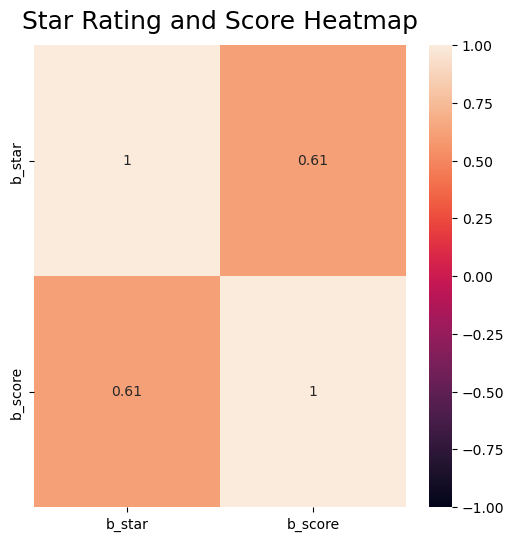

In [370]:
### Plotting the correlation between various columns
plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(text_df[['b_star','b_score']].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Star Rating and Score Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

## VIF Measure

In [371]:
# prompt: check the variance inflation factor based on every column from text_df

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = text_df[['b_star','b_score']].columns
vif["VIF"] = [variance_inflation_factor(text_df[['b_star','b_score']].values, i) for i in range(text_df[['b_star','b_score']].shape[1])]

vif


,Features,VIF
0,b_star,5.102889
1,b_score,5.102889


# Preprocessing

In [372]:
# casefolding
def to_lowercase(text):
  text = text.lower()
  return text

In [373]:
# remove word repetition
def word_repetition(text):
  text = re.sub(r'(.)\1+', r'\1\1', text)
  return text

In [374]:
# remove punctuation repetition
def punct_repetition(text, default_replace=""):
  text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, text)
  return text

In [375]:
# fix contractions (e.g. i'm -> i am)
def fix_contractions(text):
  text = contractions.fix(text)
  return text

In [376]:
# set stopwords to english
stop_words = set(stopwords.words('english'))
# set stemmer to english
snowball_stemmer = SnowballStemmer('english')

In [377]:
# tokenize text
def custom_tokenize(text, keep_punct = False, keep_alnum = False, keep_stop = False):
  token_list = word_tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [378]:
# stemming tokens
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [379]:
# lemmatize tokens
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [380]:
# function to preprocess text
def process_review(text, verbose=False):
  # if verbose: print("Initial tweet: {}".format(review))

  ## Word Features
  text = to_lowercase(text) # lower case
  text = fix_contractions(text) # replace contractions
  text = punct_repetition(text) # replace punctuation repetition
  text = word_repetition(text) # replace word repetition

  # if verbose: print("Post Word processing review: {}".format(text))

  ## Tokenization & Stemming
  tokens = custom_tokenize(text, keep_alnum=False, keep_stop=False) # tokenize
  stem = stem_tokens(tokens, snowball_stemmer) # stem tokens

  return stem

In [381]:
# apply text preprocessing to the review text
text_df['tokens_titletext'] = text_df['com_titletext'].apply(process_review)
text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge..."
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ..."
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i..."
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian..."
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea..."
...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w..."
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco..."
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ..."
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,..."


In [382]:
print(text_df['b_star'].value_counts())

b_star
1.0    6401
0.0    1135
Name: count, dtype: int64


# Split Data

In [383]:
X = text_df["tokens_titletext"].tolist()
y = text_df["b_star"].tolist()

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, train_size=0.80)

# TF-IDF

In [385]:
# function to fit tfidf vectorizer
def fit_tfidf(review_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(review_corpus)
  return tf_vect

In [386]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

c:\Users\FATISDA\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Confusion Matrix

In [387]:
def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  x_axis_labels = ['neg','pos'] # labels for x-axis
  y_axis_labels = ['neg','pos'] # labels for y-axis
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sns

# Model Building

In [388]:
def model_building(model, X_train, y_train, X_test):
    # start time measurement for training
    start_time = time.time()

    # create the model
    training_model = model.fit(X_train, y_train)

    # end time measurement for training
    training_time = time.time() - start_time

    # predict using the model
    y_pred = training_model.predict(X_test)

    # print the training time, model accuracy & report
    print("Training Time: {:.2f} seconds".format(training_time))
    print("NB Model Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, digits=3))

    return training_model, y_pred

# 1. Before Balancing

## 1.1. Naive Bayes Before Balancing

In [389]:
# create Naive Bayes model
nbmodel = MultinomialNB()
nbmodel, nb_pred = model_building(nbmodel, X_train_tf, y_train, X_test_tf)

Training Time: 0.00 seconds
NB Model Accuracy: 88.13%
              precision    recall  f1-score   support

         0.0      1.000     0.152     0.263       211
         1.0      0.879     1.000     0.935      1297

    accuracy                          0.881      1508
   macro avg      0.939     0.576     0.599      1508
weighted avg      0.896     0.881     0.841      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

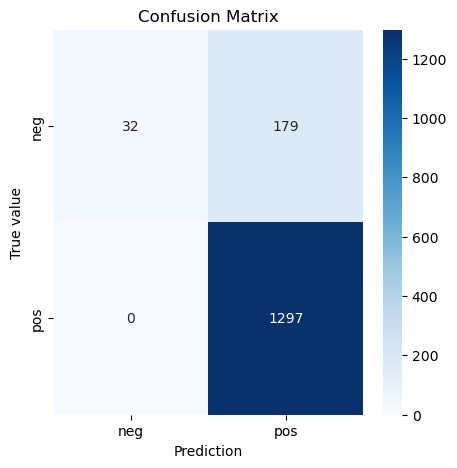

In [390]:
plot_confusion(confusion_matrix(y_test, nb_pred))

In [465]:
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
nb_predictions = nbmodel.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
nb_predicted_labels = [label_map[prediction] for prediction in nb_predictions]

# Adding the prediction column to the DataFrame
text_df['nb_pred'] = nb_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b,svm_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",neg,neg,neg,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",neg,pos,pos,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos,pos


In [392]:
text_df['nb_pred'].value_counts()

nb_pred
pos    7268
neg     268
Name: count, dtype: int64

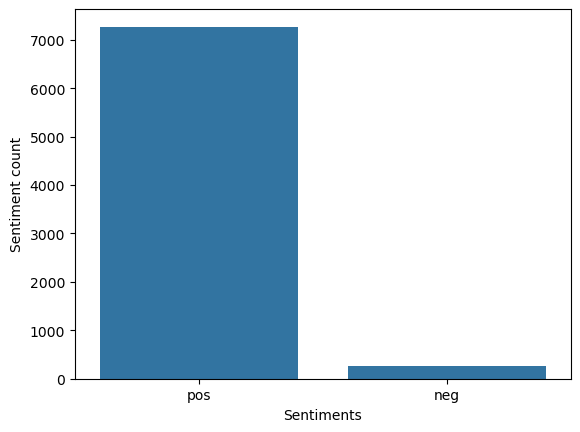

In [393]:
text_df_sorted = text_df.sort_values('nb_pred', ascending=False)
ax = sns.countplot(x ='nb_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Naive Bayes Pie Chart')

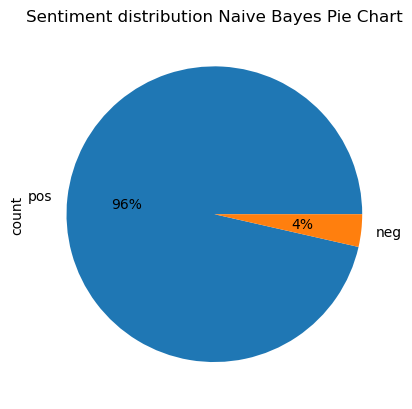

In [394]:
text_df_sorted['nb_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Naive Bayes Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

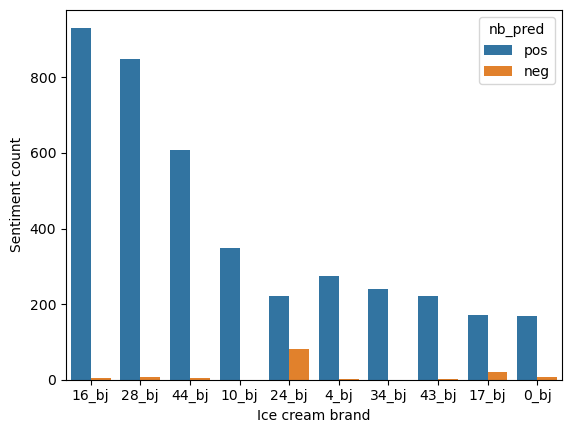

In [395]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='nb_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

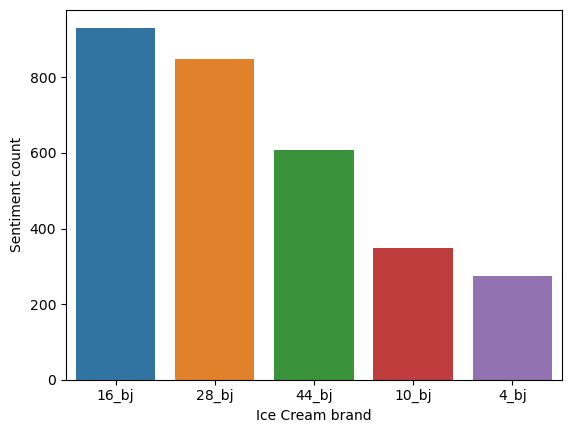

In [396]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

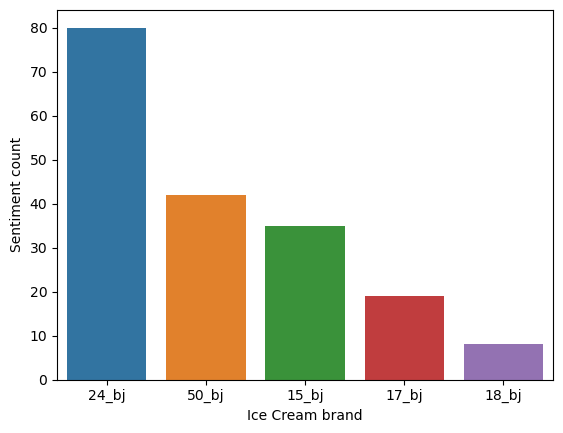

In [397]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['nb_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 1.2. Logistic Regression Before Balancing

In [398]:
# create Logistic Regression Model
modelLr = LogisticRegression(random_state=seed)
model_lr_tf, y_pred_lr = model_building(modelLr, X_train_tf, y_train, X_test_tf)

Training Time: 0.04 seconds
NB Model Accuracy: 94.76%
              precision    recall  f1-score   support

         0.0      0.946     0.664     0.780       211
         1.0      0.948     0.994     0.970      1297

    accuracy                          0.948      1508
   macro avg      0.947     0.829     0.875      1508
weighted avg      0.948     0.948     0.944      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

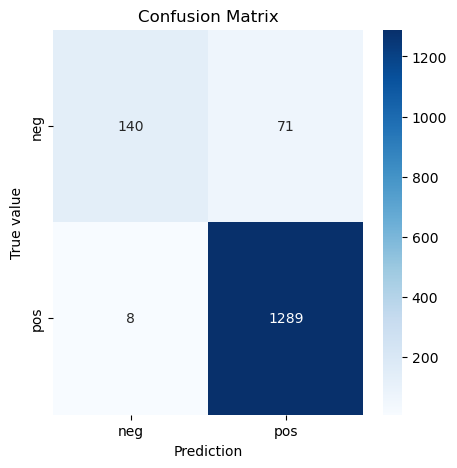

In [399]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred_lr))

In [400]:
# predict review with lr model
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
lr_predictions = model_lr_tf.predict(tf_token)
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]
text_df['lr_pred'] = lr_predicted_labels

text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos
...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos


In [401]:
text_df['lr_pred'].value_counts()

lr_pred
pos    6709
neg     827
Name: count, dtype: int64

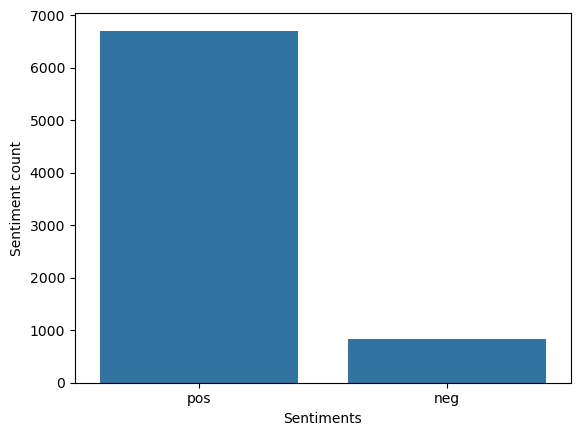

In [402]:
# plot prediction result
text_df_sorted = text_df.sort_values('lr_pred', ascending=False)
ax = sns.countplot(x ='lr_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution LR Pie Chart')

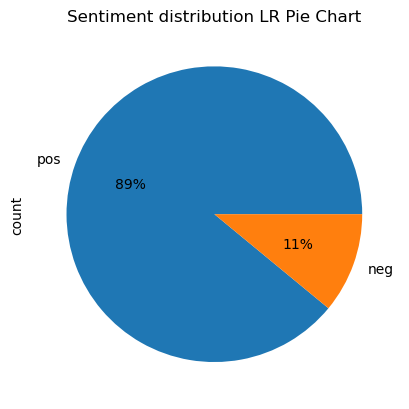

In [403]:
text_df_sorted['lr_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution LR Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

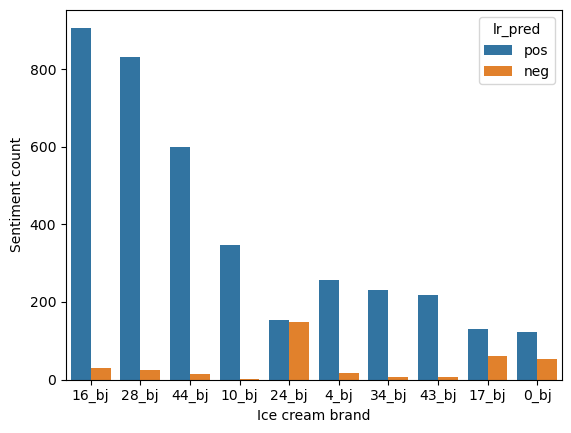

In [404]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='lr_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

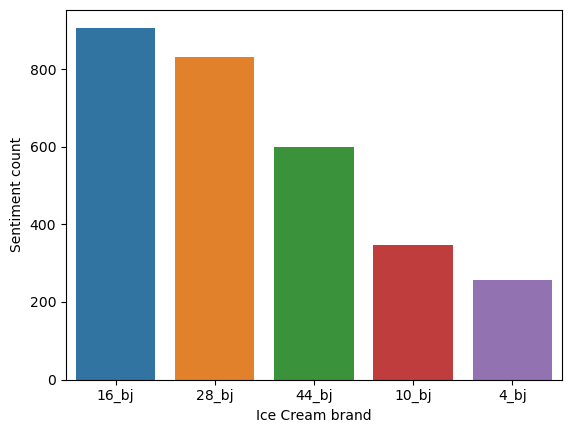

In [405]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

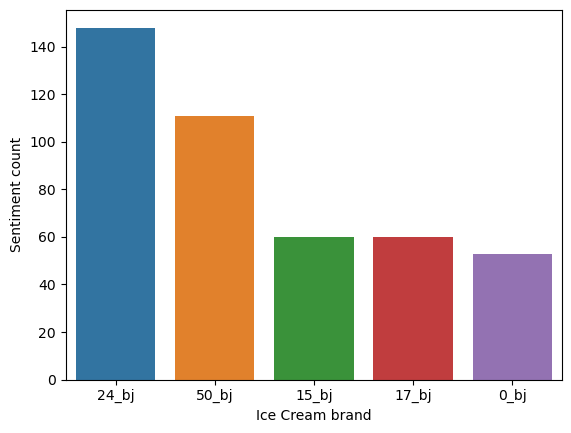

In [406]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['lr_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 1.3. Support Vector Machine Before Balancing

In [466]:
# create SVM model
svm_model = SVC(kernel='linear', random_state=seed)  # In this regard, we use the Linear kernel
svm_model, y_pred_svm = model_building(svm_model, X_train_tf, y_train, X_test_tf)

Training Time: 1.07 seconds
NB Model Accuracy: 96.02%
              precision    recall  f1-score   support

         0.0      0.922     0.782     0.846       211
         1.0      0.965     0.989     0.977      1297

    accuracy                          0.960      1508
   macro avg      0.944     0.886     0.912      1508
weighted avg      0.959     0.960     0.959      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

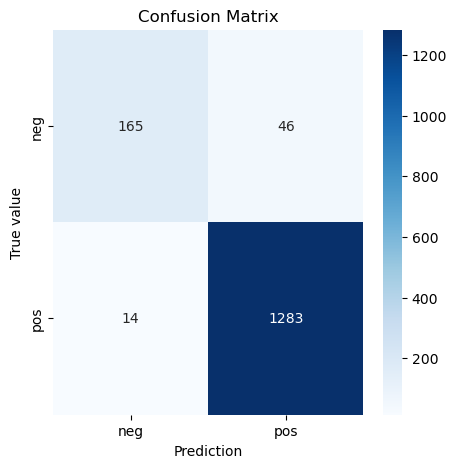

In [467]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred_svm))

In [468]:
# Making predictions on text data that has been transformed into TF-IDF
svm_predictions = svm_model.predict(tf_token)

# Converting prediction results into "pos" or "neg" labels
svm_predicted_labels = [label_map[prediction] for prediction in svm_predictions]

# Adding the prediction results column to the DataFrame
text_df['svm_pred'] = svm_predicted_labels

text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b,svm_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",neg,neg,neg,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",neg,pos,pos,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos,pos


In [410]:
text_df['svm_pred'].value_counts()

svm_pred
pos    6511
neg    1025
Name: count, dtype: int64

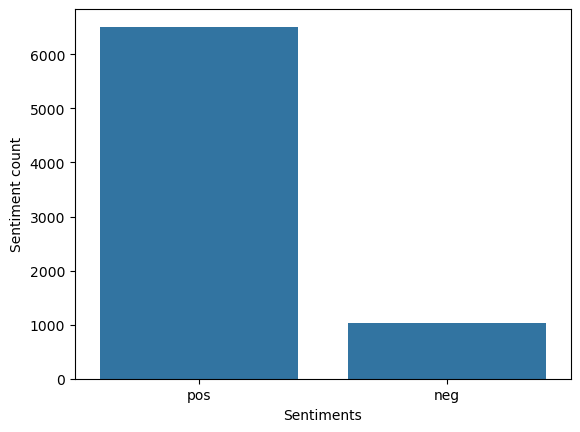

In [411]:
# plot prediction result
text_df_sorted = text_df.sort_values('svm_pred', ascending=False)
ax = sns.countplot(x ='svm_pred', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution SVM Pie Chart')

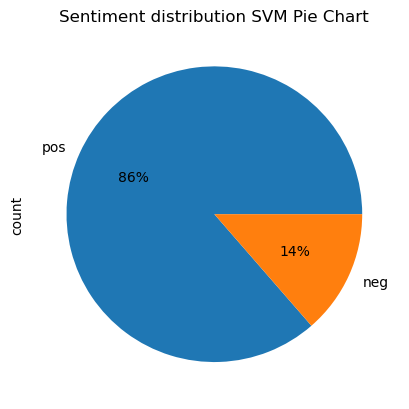

In [412]:
text_df_sorted['svm_pred'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution SVM Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

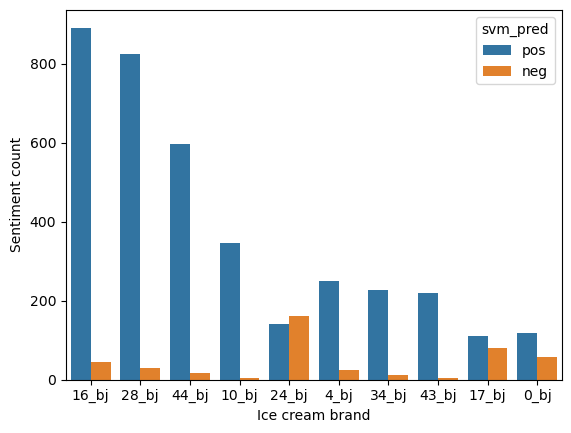

In [413]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='svm_pred', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

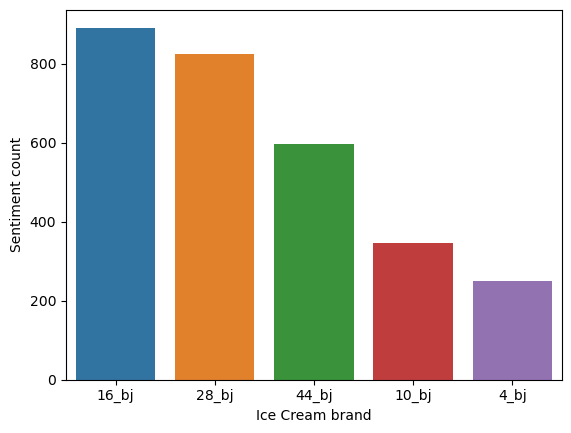

In [414]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['svm_pred'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

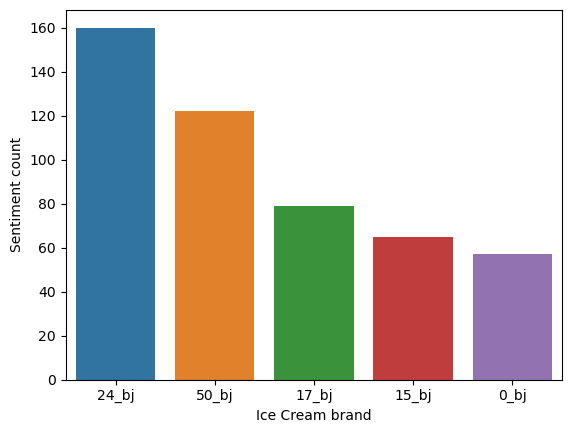

In [415]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['svm_pred'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

# Balancing Data

In [416]:
def plot_2d_space(X, y, label='Classes'):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X_pca[y == l, 0],
            X_pca[y == l, 1],
            c=c, label=l, marker=m
        )

    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

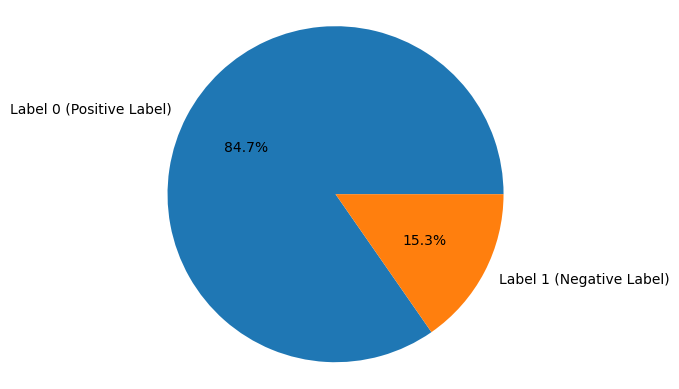

In [417]:
# Class Imbalance Check
plt.pie(pd.Series(y_train).value_counts(),
        labels=['Label 0 (Positive Label)', 'Label 1 (Negative Label)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [418]:
# SMOTE on full training data
tf_full = fit_tfidf(X)
X_full_tf = tf_full.transform(X)
smote = SMOTE()
X_smote_full, y_smote_full = smote.fit_resample(X_full_tf, text_df['b_star'].values)
#SMOTE Training data
X_smote, y_smote = smote.fit_resample(X_train_tf, y_train)
# print(X_smote.shape, y_smote.shape)

c:\Users\FATISDA\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


C:\Users\FATISDA\AppData\Local\Temp\ipykernel_24496\209822855.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.pie(pd.value_counts(y_smote),
C:\Users\FATISDA\AppData\Local\Temp\ipykernel_24496\209822855.py:2: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  plt.pie(pd.value_counts(y_smote),


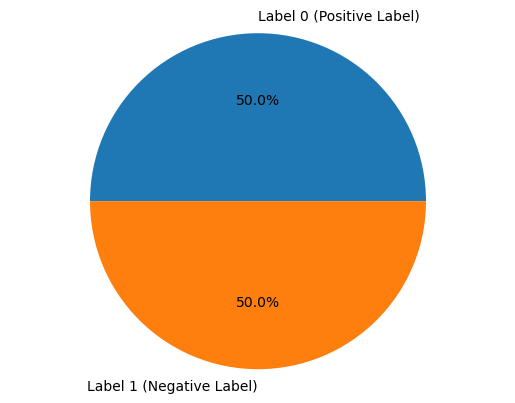

In [419]:
# Class Imbalance Check
plt.pie(pd.value_counts(y_smote),
        labels=['Label 0 (Positive Label)', 'Label 1 (Negative Label)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

# 2. After Balancing

## 2.1. Naive Bayes After Balancing

In [420]:
# create Naive Bayes model
nbmodel = MultinomialNB()
nbmodel, nb_pred = model_building(nbmodel, X_smote, y_smote, X_test_tf)

Training Time: 0.00 seconds
NB Model Accuracy: 93.04%
              precision    recall  f1-score   support

         0.0      0.695     0.896     0.783       211
         1.0      0.982     0.936     0.959      1297

    accuracy                          0.930      1508
   macro avg      0.839     0.916     0.871      1508
weighted avg      0.942     0.930     0.934      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

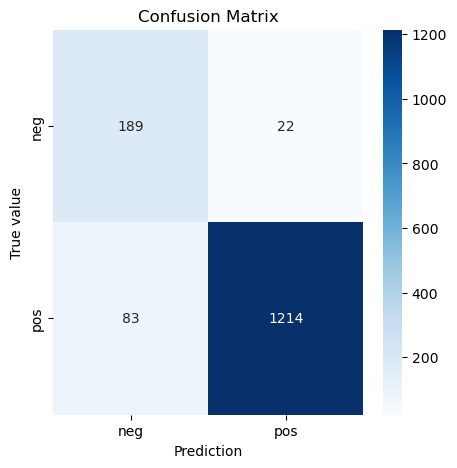

In [421]:
plot_confusion(confusion_matrix(y_test, nb_pred))

In [470]:
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
nb_predictions = nbmodel.predict(tf_token)

# Mapping prediction labels to class labels ("pos" and "neg")
label_map = {1: "pos", 0: "neg"}
nb_predicted_labels = [label_map[prediction] for prediction in nb_predictions]

# Adding the prediction column to the DataFrame
text_df['nb_pred_b'] = nb_predicted_labels

# Displaying the DataFrame with the prediction column
text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b,svm_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",neg,neg,neg,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",neg,neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",neg,neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",neg,pos,pos,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos,pos


In [423]:
text_df['nb_pred_b'].value_counts()

nb_pred_b
pos    6074
neg    1462
Name: count, dtype: int64

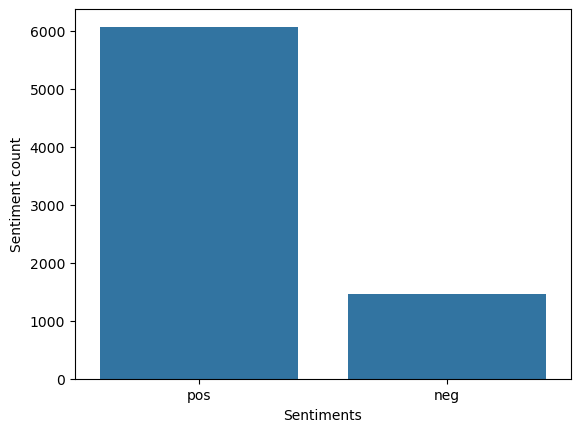

In [424]:
text_df_sorted = text_df.sort_values('nb_pred_b', ascending=False)
ax = sns.countplot(x ='nb_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution Naive Bayes Pie Chart')

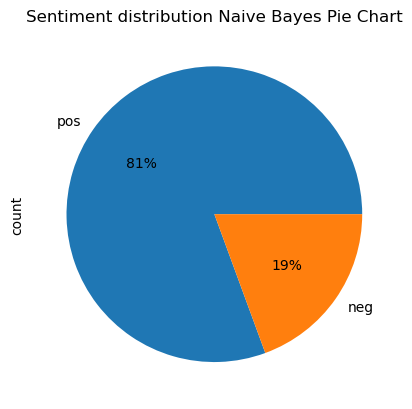

In [425]:
text_df_sorted['nb_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution Naive Bayes Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

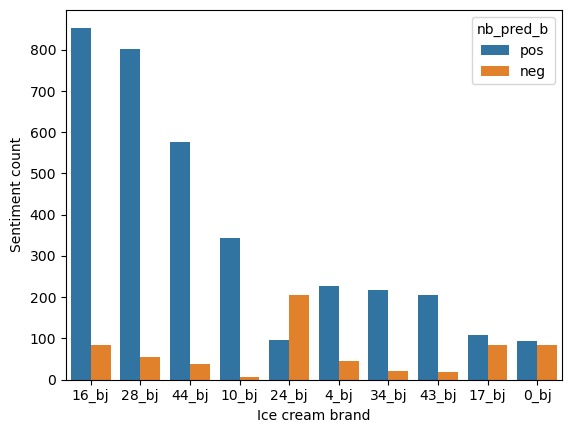

In [426]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['key'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['key'].isin(df_prod_reviewcount.index)]
ax1 = sns.countplot(x='key', hue='nb_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [427]:
df_prod_reviewcount

key
16_bj    937
28_bj    855
44_bj    614
10_bj    349
24_bj    301
4_bj     274
34_bj    239
43_bj    224
17_bj    190
0_bj     176
Name: count, dtype: int64

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

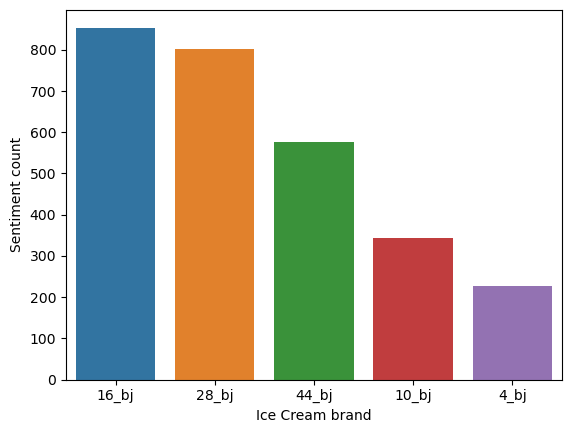

In [428]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [429]:
df_prod_positivecount

,key,count
0,16_bj,854
1,28_bj,801
2,44_bj,577
3,10_bj,343
4,4_bj,228


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

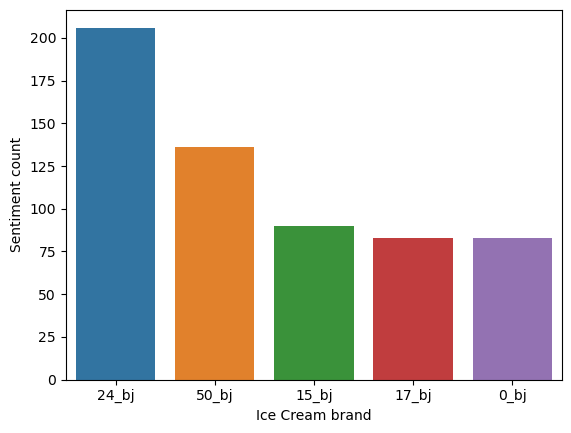

In [430]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['nb_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [431]:
df_prod_negativecount

,key,count
0,24_bj,206
1,50_bj,136
2,15_bj,90
3,17_bj,83
4,0_bj,83


## 2.2. Logistic Regression After Balancing

In [432]:
# create lr model
modelLr = LogisticRegression(random_state=seed)
model_lr_tf, y_pred = model_building(modelLr, X_smote, y_smote, X_test_tf)

Training Time: 0.05 seconds
NB Model Accuracy: 95.16%
              precision    recall  f1-score   support

         0.0      0.783     0.905     0.840       211
         1.0      0.984     0.959     0.971      1297

    accuracy                          0.952      1508
   macro avg      0.883     0.932     0.906      1508
weighted avg      0.956     0.952     0.953      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

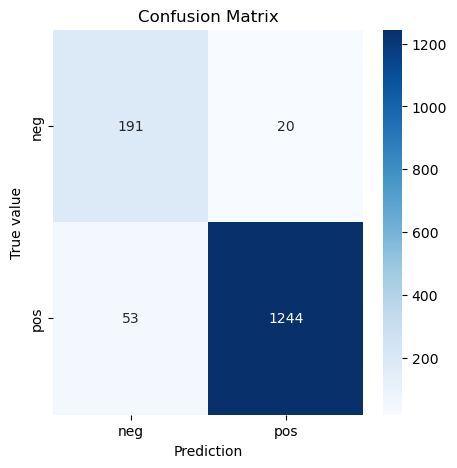

In [433]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred))

In [434]:
# predict review with lr model
token_text = text_df['tokens_titletext']
tf_token = tf.transform(token_text)
lr_predictions = model_lr_tf.predict(tf_token)
label_map = {1: "pos", 0: "neg"}
lr_predicted_labels = [label_map[prediction] for prediction in lr_predictions]
text_df['lr_pred_b'] = lr_predicted_labels

text_df

,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos,pos,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos


In [435]:
text_df['lr_pred_b'].value_counts()

lr_pred_b
pos    6227
neg    1309
Name: count, dtype: int64

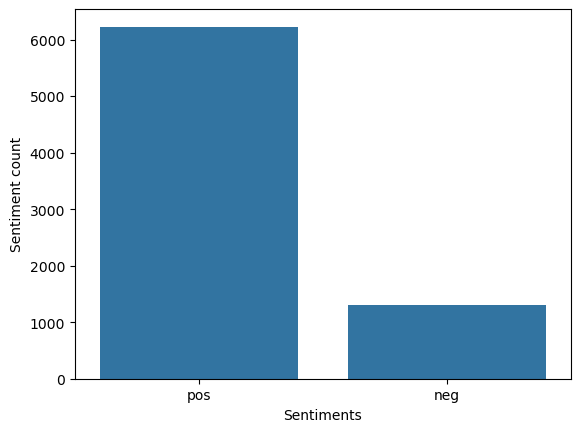

In [436]:
# plot prediction result
text_df_sorted = text_df.sort_values('lr_pred_b', ascending=False)
ax = sns.countplot(x ='lr_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution LR Pie Chart')

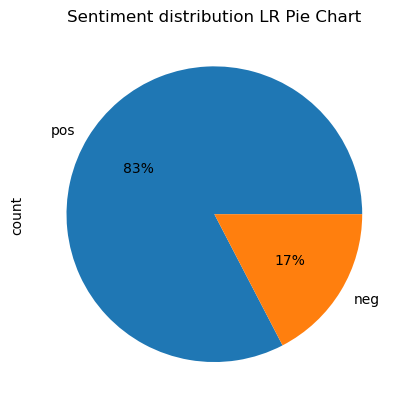

In [437]:
text_df_sorted['lr_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution LR Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

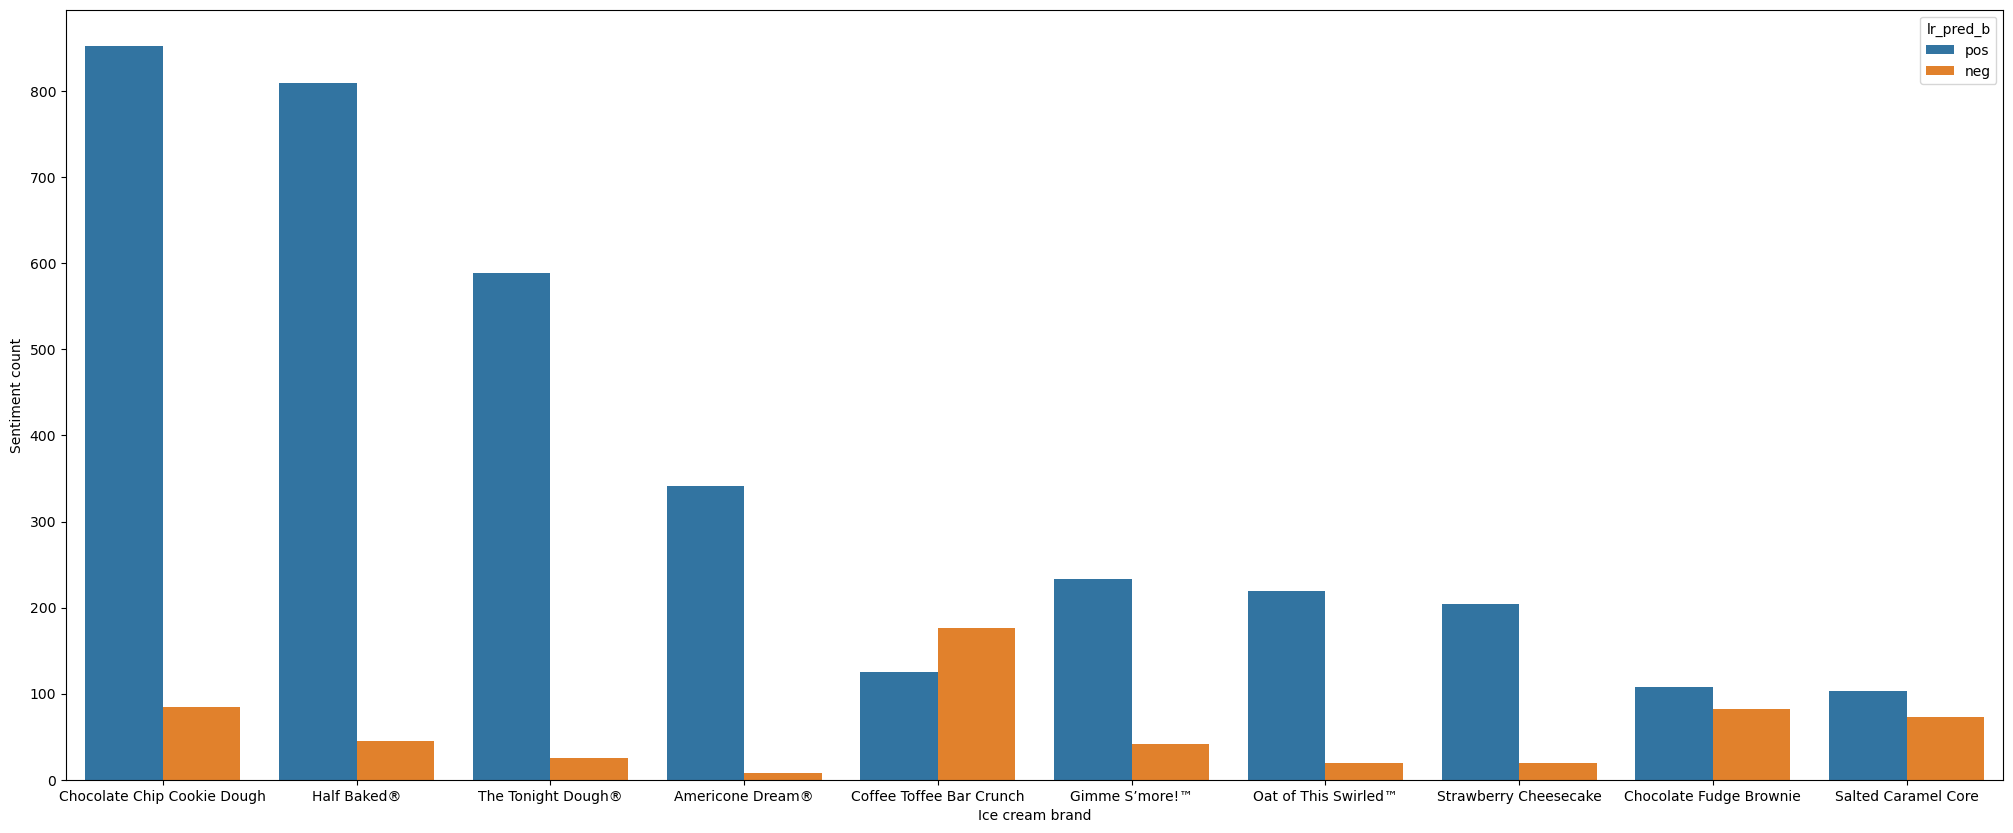

In [438]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['product_name'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['product_name'].isin(df_prod_reviewcount.index)]
plt.figure(figsize=(25, 10)) # Set the size of the bar
ax1 = sns.countplot(x='product_name', hue='lr_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [439]:
df_prod_reviewcount

product_name
Chocolate Chip Cookie Dough    937
Half Baked®                    855
The Tonight Dough®             614
Americone Dream®               349
Coffee Toffee Bar Crunch       301
Gimme S’more!™                 274
Oat of This Swirled™           239
Strawberry Cheesecake          224
Chocolate Fudge Brownie        190
Salted Caramel Core            176
Name: count, dtype: int64

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

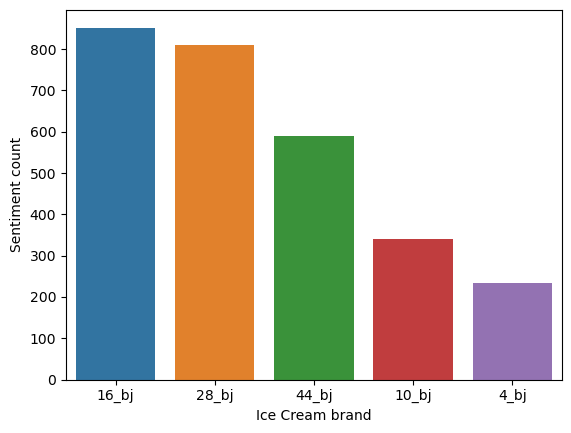

In [440]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [441]:
df_prod_positivecount

,key,count
0,16_bj,852
1,28_bj,810
2,44_bj,589
3,10_bj,341
4,4_bj,233


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

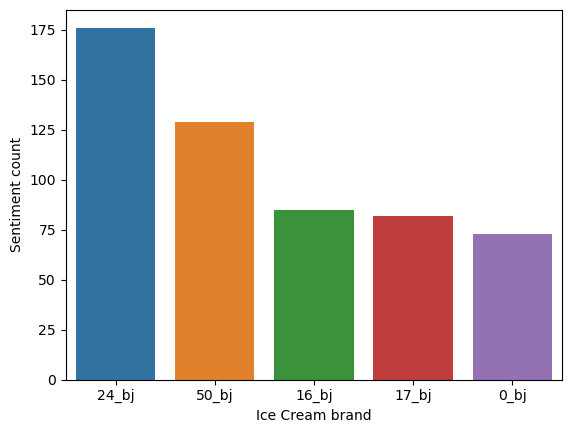

In [442]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['lr_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

## 2.3. Support Vector Machine After Balancing

In [464]:
# create lr model
svm_model_b = SVC(kernel='linear', random_state=seed)  # In this regard, we use the Linear kernel
svm_model, y_pred_svm = model_building(svm_model_b, X_smote, y_smote, X_test_tf)

Training Time: 3.37 seconds
NB Model Accuracy: 95.89%
              precision    recall  f1-score   support

         0.0      0.840     0.872     0.856       211
         1.0      0.979     0.973     0.976      1297

    accuracy                          0.959      1508
   macro avg      0.910     0.923     0.916      1508
weighted avg      0.960     0.959     0.959      1508



<module 'seaborn' from 'c:\\Users\\FATISDA\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

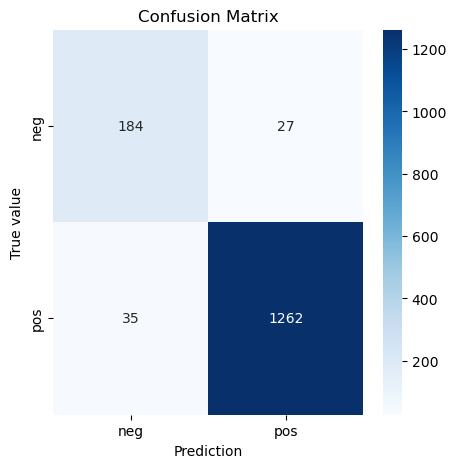

In [444]:
# plot confusion
plot_confusion(confusion_matrix(y_test, y_pred_svm))

In [445]:
# Predict the text data which has been transformed into TF-IDF
svm_predictions = svm_model.predict(tf_token)

# Change the prediction results into either "pos" or "neg" label
svm_predicted_labels = [label_map[prediction] for prediction in svm_predictions]

# Add the prediction results into DataFrame
text_df['svm_pred_b'] = svm_predicted_labels

text_df


,key,product_name,stars,com_titletext,b_star,b_score,tokens_titletext,nb_pred,lr_pred,svm_pred,nb_pred_b,lr_pred_b,svm_pred_b
1,0_bj,Salted Caramel Core,5,I’m OBSESSED with this pint! I decided to try ...,1.0,0.9442,"[obsess, pint, decid, tri, although, not, huge...",pos,neg,neg,neg,neg,neg
3,0_bj,Salted Caramel Core,5,Obsessed!!! Why are people complaining about t...,1.0,0.9270,"[obsess, peopl, complain, blond, browni, not, ...",pos,pos,pos,pos,pos,pos
4,0_bj,Salted Caramel Core,1,Worst Ice Cream Ever! This ice cream is worst ...,0.0,-0.7210,"[worst, ice, cream, ever, ice, cream, worst, i...",pos,neg,neg,neg,neg,neg
5,0_bj,Salted Caramel Core,2,Way Too Salty I bought this last night to go w...,0.0,-0.8834,"[way, salti, bought, last, night, go, louisian...",pos,neg,neg,neg,neg,neg
8,0_bj,Salted Caramel Core,2,"Could be better. I LOVE caramel, so much so th...",0.0,0.9550,"[could, better, love, caramel, much, could, ea...",pos,pos,pos,neg,neg,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,56_bj,Peanut Butter Fudge Core,5,Peanut butter fudge heaven Oh man I use to be ...,1.0,0.9049,"[peanut, butter, fudg, heaven, oh, man, use, w...",pos,pos,pos,pos,pos,pos
7939,56_bj,Peanut Butter Fudge Core,5,The best Chocolate Ice Cream Combo This is the...,1.0,0.8070,"[best, chocol, ice, cream, combo, first, choco...",pos,pos,pos,pos,pos,pos
7940,56_bj,Peanut Butter Fudge Core,5,PERFECT!! This is the best pint of ice cream I...,1.0,0.9552,"[perfect, best, pint, ice, cream, ever, like, ...",pos,pos,pos,pos,pos,pos
7941,56_bj,Peanut Butter Fudge Core,5,My favorite! This is my favorite ice cream eve...,1.0,0.8350,"[favorit, favorit, ice, cream, ever, not, get,...",pos,pos,pos,pos,pos,pos


In [446]:
text_df['svm_pred_b'].value_counts()

svm_pred_b
pos    6299
neg    1237
Name: count, dtype: int64

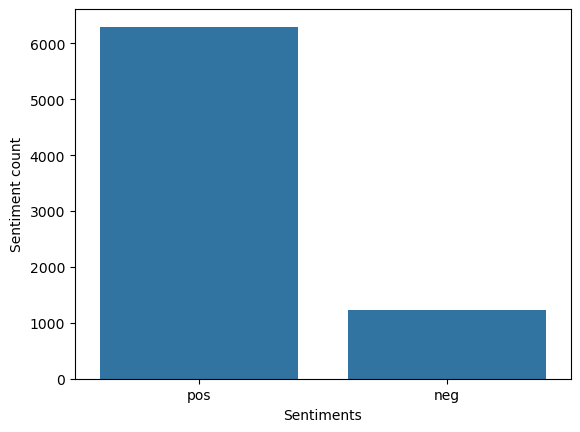

In [447]:
# plot prediction result
text_df_sorted = text_df.sort_values('svm_pred_b', ascending=False)
ax = sns.countplot(x ='svm_pred_b', data = text_df_sorted)
ax.set(ylabel='Sentiment count', xlabel='Sentiments')
plt.show()

Text(0.5, 1.0, 'Sentiment distribution SVM Pie Chart')

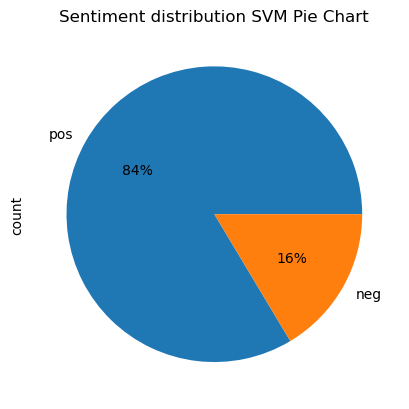

In [448]:
text_df_sorted['svm_pred_b'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Sentiment distribution SVM Pie Chart")

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice cream brand')]

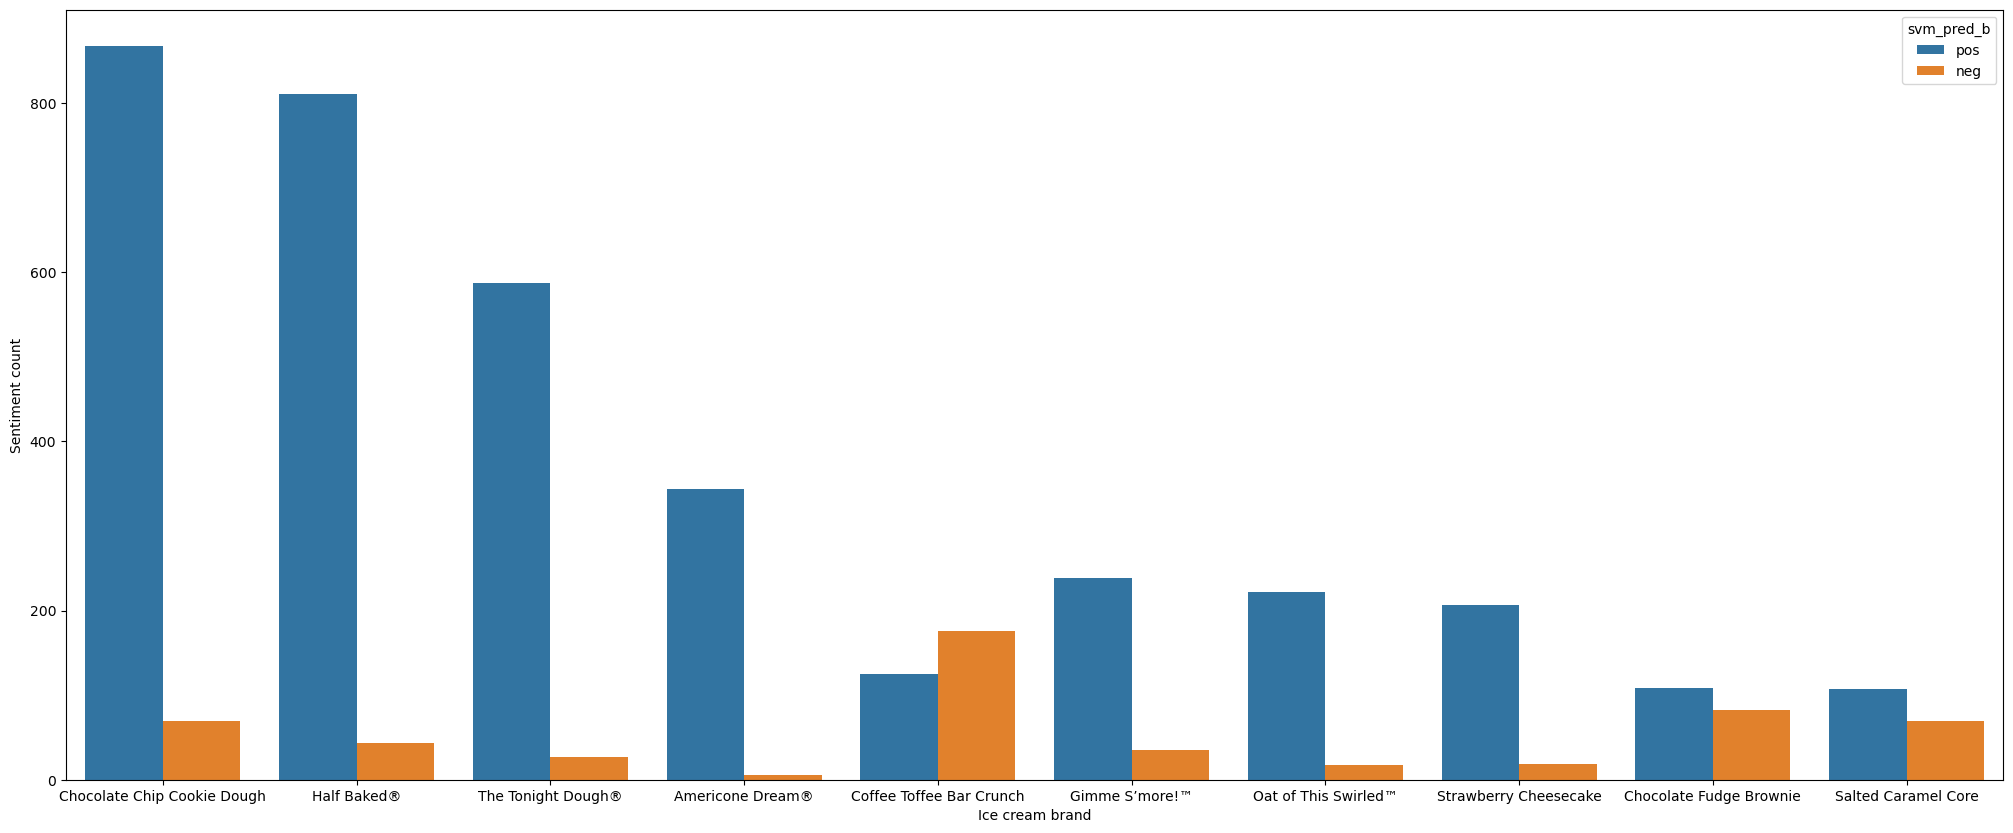

In [449]:
# Top 10 ice cream brand sort by number of reviews
df_prod_reviewcount = text_df_sorted['product_name'].value_counts().head(10)
df_prod_isin = text_df_sorted[text_df_sorted['product_name'].isin(df_prod_reviewcount.index)]
plt.figure(figsize=(25, 10)) # Set the size of the bar
ax1 = sns.countplot(x='product_name', hue='svm_pred_b', data=df_prod_isin, order=df_prod_reviewcount.index)
ax1.set(ylabel='Sentiment count', xlabel='Ice cream brand')

In [450]:
df_prod_reviewcount

product_name
Chocolate Chip Cookie Dough    937
Half Baked®                    855
The Tonight Dough®             614
Americone Dream®               349
Coffee Toffee Bar Crunch       301
Gimme S’more!™                 274
Oat of This Swirled™           239
Strawberry Cheesecake          224
Chocolate Fudge Brownie        190
Salted Caramel Core            176
Name: count, dtype: int64

[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

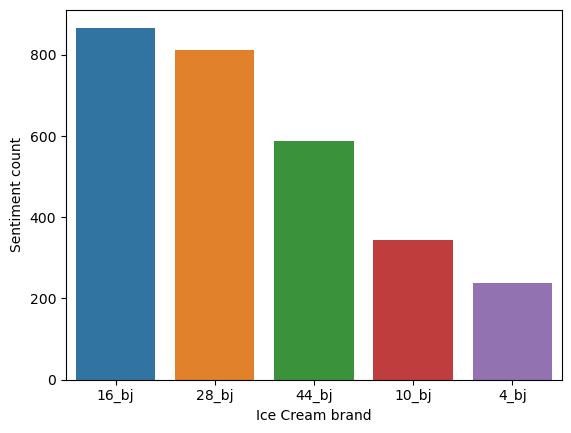

In [451]:
# Top 5 ice cream brand sort by positive review
df_posreview = text_df_sorted.loc[text_df_sorted['svm_pred_b'] == 'pos']
df_prod_positivecount = df_posreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_positivecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [452]:
df_prod_positivecount

,key,count
0,16_bj,867
1,28_bj,811
2,44_bj,587
3,10_bj,344
4,4_bj,239


[Text(0, 0.5, 'Sentiment count'), Text(0.5, 0, 'Ice Cream brand')]

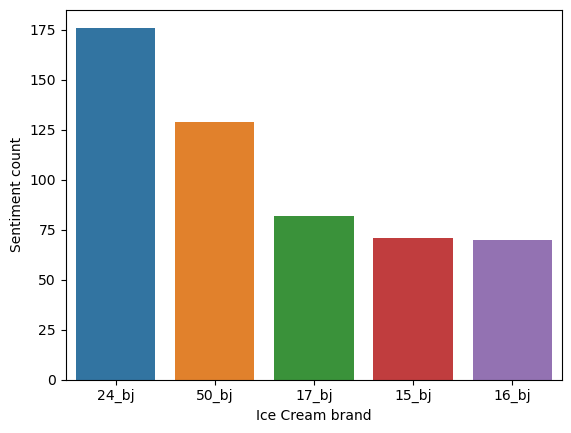

In [453]:
# Top 5 ice cream brand sort by negative review
df_negreview = text_df_sorted.loc[text_df_sorted['svm_pred_b'] == 'neg']
df_prod_negativecount = df_negreview['key'].value_counts().head(5).reset_index(name='count')
ax2 = sns.barplot(x='key', y='count', data=df_prod_negativecount, hue='key')
ax2.set(ylabel='Sentiment count', xlabel='Ice Cream brand')

In [454]:
df_prod_negativecount

,key,count
0,24_bj,176
1,50_bj,129
2,17_bj,82
3,15_bj,71
4,16_bj,70


# Plotting Logistic Regression, Naive Bayes, and Support Vector Machine

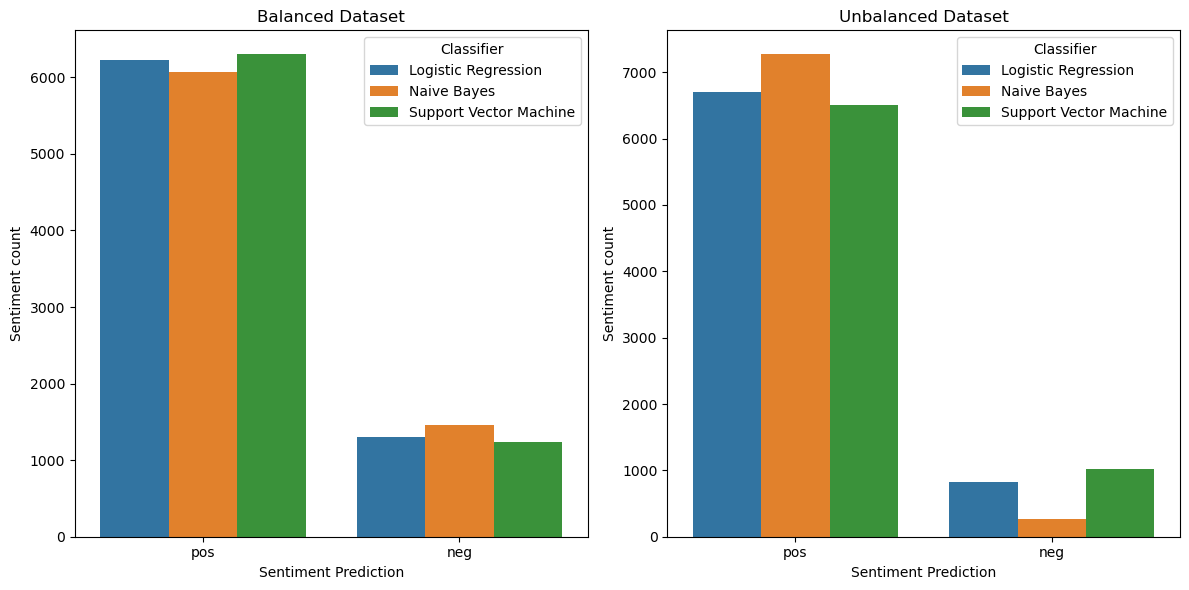

In [455]:
# Reshape the data for plotting
balanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred_b', 'nb_pred_b', 'svm_pred_b'],
                          var_name='Classifier', value_name='Sentiment')
unbalanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred', 'nb_pred', 'svm_pred'],
                            var_name='Classifier', value_name='Sentiment')

# Rename the classifier labels
balanced_melted['Classifier'] = balanced_melted['Classifier'].map({
    'lr_pred_b': 'Logistic Regression',
    'nb_pred_b': 'Naive Bayes',
    'svm_pred_b': 'Support Vector Machine'
})
unbalanced_melted['Classifier'] = unbalanced_melted['Classifier'].map({
    'lr_pred': 'Logistic Regression',
    'nb_pred': 'Naive Bayes',
    'svm_pred': 'Support Vector Machine'
})

# Plotting
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Classifier', data=balanced_melted, ax=ax1)
ax1.set_ylabel('Sentiment count')
ax1.set_xlabel('Sentiment Prediction')
ax1.set_title('Balanced Dataset')

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', hue='Classifier', data=unbalanced_melted, ax=ax2)
ax2.set_ylabel('Sentiment count')
ax2.set_xlabel('Sentiment Prediction')
ax2.set_title('Unbalanced Dataset')

plt.tight_layout()
plt.show()

In [456]:
balanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

In [457]:
unbalanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

# Plotting Logistic Regression, Naive Bayes, and Support Vector Machine

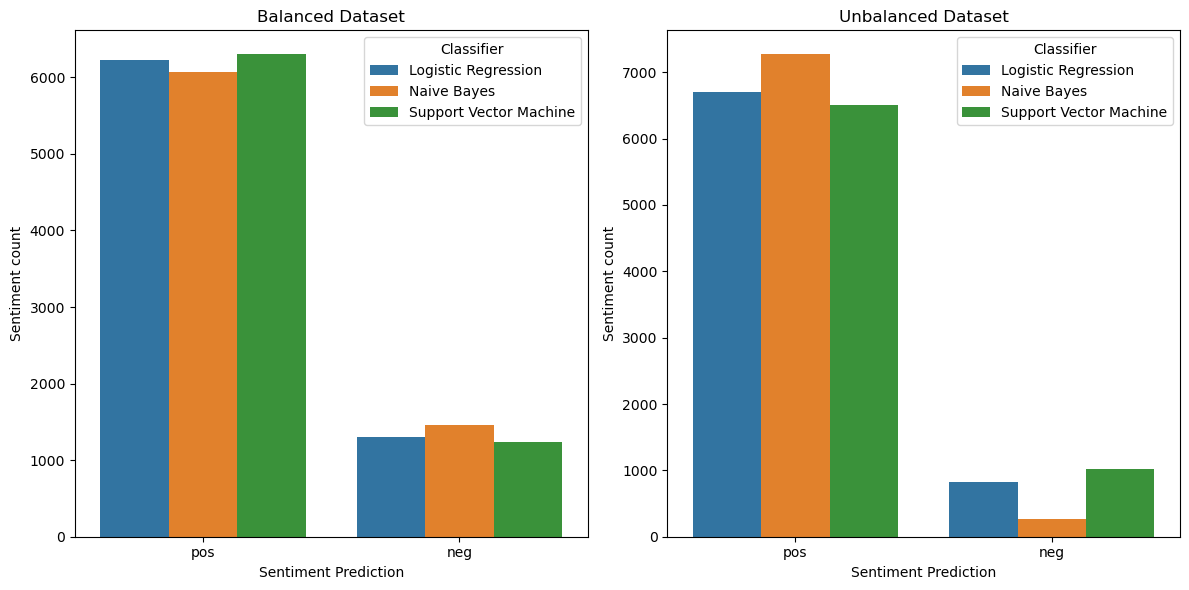

In [458]:
# Reshape the data for plotting
balanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred_b', 'nb_pred_b','svm_pred_b'],
                          var_name='Classifier', value_name='Sentiment')
unbalanced_melted = pd.melt(text_df_sorted, value_vars=['lr_pred', 'nb_pred', 'svm_pred'],
                            var_name='Classifier', value_name='Sentiment')

# Rename the classifier labels
balanced_melted['Classifier'] = balanced_melted['Classifier'].map({
    'lr_pred_b': 'Logistic Regression',
    'nb_pred_b': 'Naive Bayes',
    'svm_pred_b': 'Support Vector Machine'
})
unbalanced_melted['Classifier'] = unbalanced_melted['Classifier'].map({
    'lr_pred': 'Logistic Regression',
    'nb_pred': 'Naive Bayes',
    'svm_pred': 'Support Vector Machine'
})

# Plotting
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Classifier', data=balanced_melted, ax=ax1)
ax1.set_ylabel('Sentiment count')
ax1.set_xlabel('Sentiment Prediction')
ax1.set_title('Balanced Dataset')

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment', hue='Classifier', data=unbalanced_melted, ax=ax2)
ax2.set_ylabel('Sentiment count')
ax2.set_xlabel('Sentiment Prediction')
ax2.set_title('Unbalanced Dataset')

plt.tight_layout()
plt.show()

In [459]:
balanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64

In [460]:
unbalanced_melted['Classifier'].value_counts()

Classifier
Logistic Regression       7536
Naive Bayes               7536
Support Vector Machine    7536
Name: count, dtype: int64